In [1]:
# データ処理のためのライブラリpandasの取り込み
import pandas as pd

In [2]:
# students.csvからの生徒データの取得
s_df = pd.read_csv("students.csv")
print(len(s_df))
s_df.head()

318


,student_id,gender,leader_flag,support_flag,score
0,1,0,0,0,335
1,2,1,0,0,379
2,3,0,0,0,350
3,4,0,0,0,301
4,5,1,0,0,317


In [3]:
# 学籍番号の確認
s_df["student_id"]

0        1
1        2
2        3
3        4
4        5
      ... 
313    314
314    315
315    316
316    317
317    318
Name: student_id, Length: 318, dtype: int64

In [4]:
# 最大値の確認
s_df["student_id"].max()

np.int64(318)

In [5]:
# 最小値の確認
s_df["student_id"].min()

np.int64(1)

In [6]:
# 1〜318まで隙間なく番号が振られているかの確認
set(range(1, 319)) == set(s_df["student_id"].tolist())

True

In [7]:
# 性別（gender）の確認
s_df["gender"].value_counts()

gender
0    160
1    158
Name: count, dtype: int64

In [8]:
# 学力試験の点数(score)の統計量の確認
s_df["score"].describe()

count    318.000000
mean     303.644654
std       65.179995
min       88.000000
25%      261.000000
50%      310.000000
75%      350.000000
max      485.000000
Name: score, dtype: float64

<Axes: >

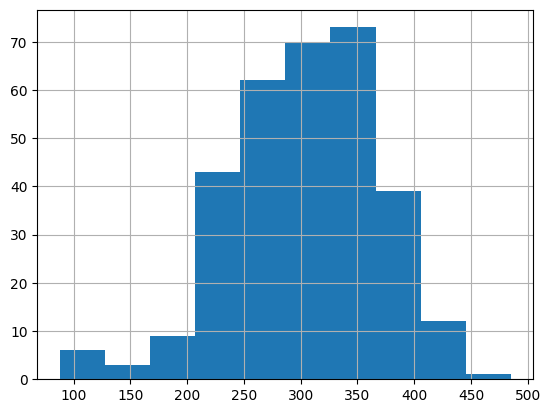

In [9]:
# 学力試験の点数(score)の分布の確認
s_df["score"].hist()

In [10]:
# リーダー気質フラグ(leader_flag)の確認
s_df["leader_flag"].value_counts()

leader_flag
0    301
1     17
Name: count, dtype: int64

In [11]:
# 特別支援フラグ(support_flag)の確認
s_df["support_flag"].value_counts()

support_flag
0    314
1      4
Name: count, dtype: int64

In [12]:
# student_pairs.csvからの特定ペアデータの取得
s_pair_df = pd.read_csv("student_pairs.csv")
print(len(s_pair_df))
s_pair_df

3


,student_id1,student_id2
0,118,189
1,72,50
2,314,233
